## Problem:
- csv extracted off the "csv_n_dataset_per_image" is not consistent from machine to machine

## Target:
- extract csv

## Method:
- having an anchor point (location at local 0,0) for every image, then calculate every points relative to the anchor

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
root = '/home/jthe/Dev/project/roofcounting/'
image_name = "Image_1c"
image_ext = ".csv"
# image_ext = ".jpg"
image_file = os.path.join("data/csv/", (image_name + image_ext))
image_path = os.path.join(root, image_file)
# image = cv2.imread(image_path)
# print(image_path)
csv_raw = pd.read_csv(image_path,sep=";")

In [23]:
# check if all x and y corresponds to the points
image_name = "Image_1c"
image_ext = ".png"
# image_ext = ".jpg"
image_file = os.path.join("data/csv/", (image_name + image_ext))
image_path = os.path.join(root, image_file)
image = cv2.imread(image_path)

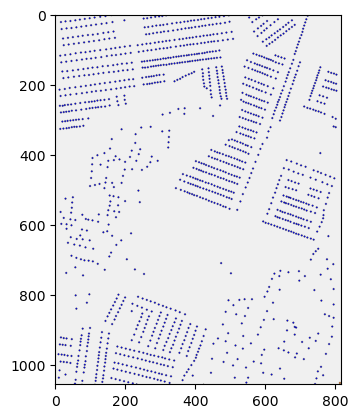

In [24]:
plt.imshow(image)

In [10]:
print(csv_raw.dtypes)
csv_raw.head()

OBJECTID         int64
Name            object
descriptio      object
timestamp       object
begin           object
end             object
altitudeMo      object
tessellate       int64
extrude          int64
visibility       int64
drawOrder        int64
icon            object
OID_             int64
FolderPath      object
SymbolID         int64
AltMode          int64
Base           float64
Clamped          int64
Extruded         int64
Snippet         object
PopupInfo       object
Shape_Leng     float64
layer           object
path            object
descript_1      object
altitude_1      object
X_Point        float64
Y_Point        float64
X_Point_UTM    float64
Y_Point_UTM    float64
X_Anchor1      float64
Y_Anchor1      float64
X_Anchor2      float64
Y_Achor2       float64
dtype: object


,OBJECTID,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,...,descript_1,altitude_1,X_Point,Y_Point,X_Point_UTM,Y_Point_UTM,X_Anchor1,Y_Anchor1,X_Anchor2,Y_Achor2
0,1,Burangkeng,,,,,,0,0,0,...,,,107.030632,-6.338273,724632.706054,9.298962e+06,724124.464915,9.299601e+06,724659.61894,9.298907e+06
1,2,Burangkeng,,,,,,0,0,0,...,,,107.030555,-6.337365,724624.507631,9.299063e+06,724124.464915,9.299601e+06,724659.61894,9.298907e+06
2,3,Burangkeng,,,,,,0,0,0,...,,,107.030761,-6.337172,724647.396839,9.299084e+06,724124.464915,9.299601e+06,724659.61894,9.298907e+06
3,4,Burangkeng,,,,,,0,0,0,...,,,107.030759,-6.337429,724647.133935,9.299055e+06,724124.464915,9.299601e+06,724659.61894,9.298907e+06
4,5,Burangkeng,,,,,,0,0,0,...,,,107.030688,-6.337627,724639.126640,9.299034e+06,724124.464915,9.299601e+06,724659.61894,9.298907e+06


In [26]:
x_0 = max(csv_raw['X_Anchor1'])
x_1 = max(csv_raw['X_Anchor2'])
y_0 = max(csv_raw['Y_Anchor1'])
y_1 = max(csv_raw['Y_Achor2'])

print("X: {}; Y: {}".format(x_1 - x_0, y_0 - y_1))

X: 535.1540249998216; Y: 693.5648900009692


In [27]:
scale_x = image.shape[1] / (x_1 - x_0)
scale_y = image.shape[0] / (y_0 - y_1)

print("scale_x: {}; scale_y: {}".format(scale_x, scale_y))

scale_x: 1.5247946607526162; scale_y: 1.5225684218221087


In [11]:
csv_raw["x"] = csv_raw['X_Point_UTM'] - csv_raw['X_Anchor1']
csv_raw["y_raw"] = csv_raw["Y_Point_UTM"] - csv_raw["Y_Anchor1"]

In [12]:
csv_raw.head()

,OBJECTID,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,...,X_Point,Y_Point,X_Point_UTM,Y_Point_UTM,X_Anchor1,Y_Anchor1,X_Anchor2,Y_Achor2,x,y_raw
0,1,Burangkeng,,,,,,0,0,0,...,107.030632,-6.338273,724632.706054,9.298962e+06,724124.464915,9.299601e+06,724659.61894,9.298907e+06,508.241139,-638.714034
1,2,Burangkeng,,,,,,0,0,0,...,107.030555,-6.337365,724624.507631,9.299063e+06,724124.464915,9.299601e+06,724659.61894,9.298907e+06,500.042716,-538.201234
2,3,Burangkeng,,,,,,0,0,0,...,107.030761,-6.337172,724647.396839,9.299084e+06,724124.464915,9.299601e+06,724659.61894,9.298907e+06,522.931924,-516.902343
3,4,Burangkeng,,,,,,0,0,0,...,107.030759,-6.337429,724647.133935,9.299055e+06,724124.464915,9.299601e+06,724659.61894,9.298907e+06,522.669020,-545.362844
4,5,Burangkeng,,,,,,0,0,0,...,107.030688,-6.337627,724639.126640,9.299034e+06,724124.464915,9.299601e+06,724659.61894,9.298907e+06,514.661725,-567.265165


In [15]:
print(csv_raw[csv_raw['y_raw'] > 1]['OBJECTID'].nunique())
print(csv_raw['OBJECTID'].count())

152
3060


In [16]:
csv = csv_raw[csv_raw['y_raw'] < 1][['x','y_raw']]

In [17]:
csv['y'] = abs(csv['y_raw'])

In [18]:
csv.drop(['y_raw'], axis=1, inplace=True)

In [19]:
csv.reset_index(inplace=True)

In [28]:
csv['x'] = csv['x'] * scale_x
csv['y'] = csv['y'] * scale_y

In [29]:
print(csv.count())
# print(csv.loc[2867])
csv.tail()

index    2908
x        2908
y        2908
dtype: int64


,index,x,y
2903,3055,683.090772,449.265020
2904,3056,704.207934,431.550666
2905,3057,668.046663,443.665427
2906,3058,716.755562,435.899445
2907,3059,691.648823,426.572605


In [30]:
output = image.copy()

for i in range(len(csv)):
#     print("i: {}, X: {}, Y:{}".format(i, int(csv.loc[i, 'x']), int(csv.loc[i, 'y'])))
    cv2.circle(output, (int(csv.loc[i, 'x']), int(csv.loc[i, 'y'])), 1, (0, 255,0), 4)


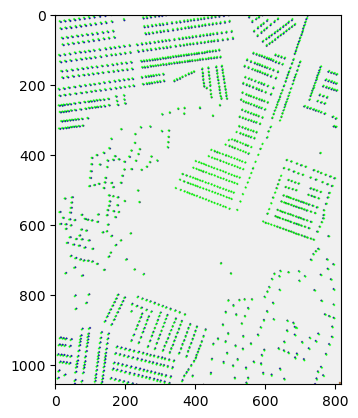

In [31]:
plt.imshow(output)

## TODO:
- export to csv

In [33]:
csv_name = "image_1c"
csv_file = os.path.join("data/csv/", (csv_name + ".csv"))
csv_path = os.path.join(root, csv_file)
csv.to_csv(csv_path, index=False)